
  ### Text Classification: Fake News


In [ ]:
# Basic Libraries
import pandas as pd
import warnings

# Text Processing
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer

# Machine Learning
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.metrics import confusion_matrix

# Graphing Libraries
import seaborn as sns
import matplotlib.pyplot as plt


#### Data Extraction

In [ ]:
data = pd.read_csv('dataset/training_data.csv')
df = data.copy()

In [4]:
df.head(3)

,0\tdonald trump sends out embarrassing new year‚s eve message; this is disturbing
0,0\tdrunk bragging trump staffer started russia...
1,0\tsheriff david clarke becomes an internet jo...
2,0\ttrump is so obsessed he even has obama‚s na...


In [6]:
# make column name first row
headers = df.columns.tolist()
df.loc[-1] = headers  
df.index = df.index + 1 
df = df.sort_index() 

# rename column name
df.columns = ['headline']

df

,headline
0,0\tdonald trump sends out embarrassing new yea...
1,0\tdrunk bragging trump staffer started russia...
2,0\tsheriff david clarke becomes an internet jo...
3,0\ttrump is so obsessed he even has obama‚s na...
4,0\tpope francis just called out donald trump d...
...,...
34147,1\ttears in rain as thais gather for late king...
34148,1\tpyongyang university needs non-u.s. teacher...
34149,1\tphilippine president duterte to visit japan...
34150,"1\t""japan's abe may have won election\tbut man..."


In [7]:
# make new column from first letter
df['label'] = df['headline'].str[0]

# move label column to the beginning
df = df[['label'] + [col for col in df.columns if col != 'label']]

# delete first two letters from each column
df['headline'] = df['headline'].str[2:]

df

,label,headline
0,0,donald trump sends out embarrassing new year‚s...
1,0,drunk bragging trump staffer started russian c...
2,0,sheriff david clarke becomes an internet joke ...
3,0,trump is so obsessed he even has obama‚s name ...
4,0,pope francis just called out donald trump duri...
...,...,...
34147,1,tears in rain as thais gather for late king's ...
34148,1,pyongyang university needs non-u.s. teachers a...
34149,1,philippine president duterte to visit japan ah...
34150,1,"""japan's abe may have won election\tbut many d..."


#### Train-Test Split

In time series problems, old data are used to predict later data.

In [ ]:
df['label'].value_counts()

label
0    17572
1    16580
Name: count, dtype: int64

In [9]:
# randomly split df into test and train data, with 50% of each label in each set
df_0 = df[df['label'] == '0']
df_1 = df[df['label'] == '1']
df_0_train = df_0.sample(n=13000, random_state=42)
df_1_train = df_1.sample(n=13000, random_state=42)
df_0_test = df_0.drop(df_0_train.index)
df_1_test = df_1.drop(df_1_train.index)

train = pd.concat([df_0_train, df_1_train])
test = pd.concat([df_0_test, df_1_test])

In [10]:
train['label'].value_counts()

label
0    13000
1    13000
Name: count, dtype: int64

In [11]:
train

,label,headline
14085,0,breaking: todd palin in ‚very serious‚ snowmob...
14640,0,muslim congressman abruptly leaves dc: uses fi...
7198,0,happy tears: young girl heartbroken over obama...
13054,0,us media throwing out ‚unmitigated bullsh*t.‚ ...
7747,0,largest gun control study in history completed...
...,...,...
28688,1,u.s. top court declines to revive north dakota...
33446,1,moscow hopes syrian opposition will attend rus...
22515,1,trump trade adviser strikes conciliatory tone ...
20394,1,prosecutors argue against prison time for new ...


In [12]:
# randomly shuffle the rows in the training data
train = train.sample(frac=1, random_state=1).reset_index(drop=True)
train

,label,headline
0,1,u.s. senator introduces bill to speed electron...
1,0,noam chomsky warns of ‚staged terrorist attack...
2,0,[video] our divider in chief
3,0,[video] yep‚gun-control bill said that today: ...
4,0,comedy gold! the left goes bonkers after trump...
...,...,...
25995,0,president curtsy delivers a really sick burn t...
25996,1,u.s. lawmakers want moratorium on commercial f...
25997,0,trump is delusional: what he just said about h...
25998,0,breaking: major health insurance carrier may p...


In [13]:
test['label'].value_counts()

label
0    4572
1    3580
Name: count, dtype: int64

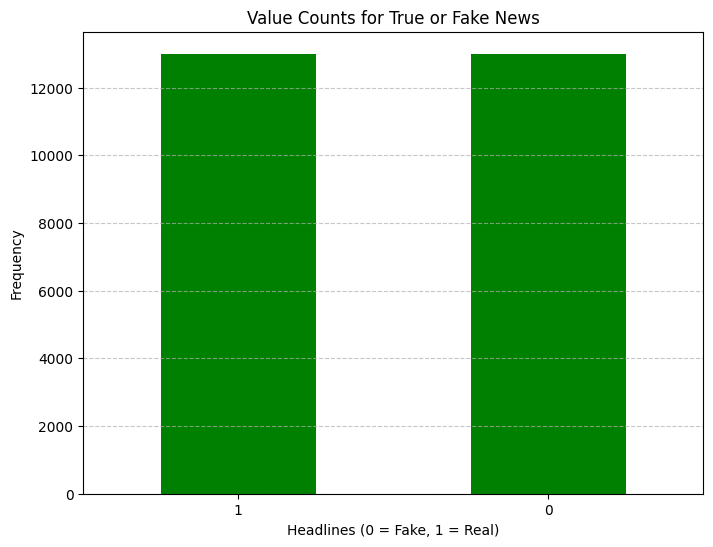

In [14]:
value_counts = train['label'].value_counts()

plt.figure(figsize=(8, 6))
value_counts.plot(kind='bar', color='green')

plt.title('Value Counts for True or Fake News')
plt.xlabel('Headlines (0 = Fake, 1 = Real)')
plt.ylabel('Frequency')

plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

In [15]:
test

,label,headline
1,0,drunk bragging trump staffer started russian c...
6,0,fresh off the golf course
7,0,trump said some insanely racist stuff inside t...
9,0,brand-new pro-trump ad features so much a** ki...
11,0,paul ryan just told us he doesn‚t care about s...
...,...,...
34135,1,restoring legality in catalonia is spanish gov...
34136,1,an independent catalonia would be out of the e...
34138,1,"""india agrees to hold talks on afghanistan wit..."
34139,1,families returning to ruined philippine city t...


In [16]:
# randomly shuffle the test data
test = test.sample(frac=1, random_state=2).reset_index(drop=True)
test

,label,headline
0,1,republican candidate kasich passed over by 'ti...
1,0,epic! check out the t-shirts two guys wore beh...
2,1,"""factbox: trump on twitter (dec 29) - approval..."
3,0,not to be missed! the brilliant daniel hannan ...
4,0,ex-subway spokesman and pedophile jared fogle ...
...,...,...
8147,0,new york gov cuomo thinks he‚s the boss of you...
8148,1,trump epa pick likely to clear senate despite ...
8149,1,republican house speaker ryan not ready to sup...
8150,0,sketchy firm behind salacious allegations agai...


#### Cleaning string characters & New columns

In [17]:
# # replace all non-alphabetic characters with a space
train_data = train.iloc[:, 1:].replace("[^a-zA-Z]", " ", regex=True)


In [18]:
train.head(3)

,label,headline
0,1,u.s. senator introduces bill to speed electron...
1,0,noam chomsky warns of ‚staged terrorist attack...
2,0,[video] our divider in chief


In [19]:
train_data.head(3)

,headline
0,u s senator introduces bill to speed electron...
1,noam chomsky warns of staged terrorist attack...
2,video our divider in chief


In [20]:
# # replace all non-alphabetic characters with a space
test_data = test.iloc[:, 1:].replace("[^a-zA-Z]", " ", regex=True)

In [21]:
train_headlines = train_data['headline'].tolist()


In [22]:
train_data.head(2)

,headline
0,u s senator introduces bill to speed electron...
1,noam chomsky warns of staged terrorist attack...


In [23]:
train_headlines

['u s  senator introduces bill to speed electronic warfare weapons',
 'noam chomsky warns of  staged terrorist attack  if enough people turn on trump',
 ' video  our divider in chief',
 ' video  yep gun control bill said that today   you can t have people walking around with guns ',
 'comedy gold  the left goes bonkers after trump s withdrawal from paris accord  video ',
 'first lady melania trump defies critics rocks beautiful stilettos on second trip to texas  video ',
 'tech investor thiel to donate       million to trump campaign',
 'george takei s latest twitter poem roasts trump s idiotic north korea statement to perfection  tweet ',
 ' liz cheney s wyoming campaign backed by big names bigger money ',
 'white house defends boehner s  lucifer  comment about cruz   he was just looking to be honest   video ',
 ' is a tweet policy   state department officials ponder',
 'hillary clinton slams trump over his insane litmus test',
 'u s  senate passes bill to fund government through sept

#### tfidf vectorizer



In [24]:
countvector = CountVectorizer(ngram_range=(2,2))


#tfidf_vectorizer = TfidfVectorizer(ngram_range=(2,2), max_features=5000, stop_words='english')


In [25]:
traindataset = countvector.fit_transform(train_headlines)

#traindataset = tfidf_vectorizer.fit_transform(train_headlines)

In [26]:
traindataset[0]

<Compressed Sparse Row sparse matrix of dtype 'int64'
	with 7 stored elements and shape (1, 146314)>

#### Model: RandomForest



In [27]:
train.head(3)

,label,headline
0,1,u.s. senator introduces bill to speed electron...
1,0,noam chomsky warns of ‚staged terrorist attack...
2,0,[video] our divider in chief


In [28]:
traindataset.toarray()

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], shape=(26000, 146314))

In [29]:
ground_truth = train['label']

In [30]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
# Implement RandomForest Classifier with additional parameters
randomclassifier = RandomForestClassifier(n_estimators=200, criterion='entropy', max_depth=10, random_state=42)


#### Model Training

In [32]:
randomclassifier.fit(traindataset, ground_truth)

RandomForestClassifier(criterion='entropy', max_depth=10, n_estimators=200,
                       random_state=42)

#### Cross-Validation



In [33]:
from sklearn.model_selection import cross_val_score # K-Folds cross validation

In [34]:
# Evaluate the model using cross-validation
scores = cross_val_score(randomclassifier, traindataset, ground_truth, cv=5)

In [35]:
print(f"Cross-validation scores: {scores}")
print(f"Mean cross-validation score: {scores.mean()}")

Cross-validation scores: [0.76461538 0.76076923 0.76269231 0.76711538 0.79596154]
Mean cross-validation score: 0.7702307692307693


#### Predictions

In [36]:
# Initialize an empty list to store headlines
test_headlines = []

# Combine headlines into a single string for each row
for row in range(0, len(test.index)):
    test_headlines.append(' '.join(str(x) for x in test_data.iloc[row, 0:]))

In [37]:
testdataset = countvector.transform(test_headlines)

#testdataset = tfidf_vectorizer.transform(test_headlines)

In [38]:
# Make predictions on the test data
predictions = randomclassifier.predict(testdataset)

In [39]:
ground_truth_test = test['label']

ground_truth_test

0       1
1       0
2       1
3       0
4       0
       ..
8147    0
8148    1
8149    1
8150    0
8151    1
Name: label, Length: 8152, dtype: object

In [40]:
print(f"Size of ground truth: {len(ground_truth_test)}")
print(f"Size of predictions: {len(predictions)}")

Size of ground truth: 8152
Size of predictions: 8152


In [41]:
accuracy = accuracy_score(ground_truth_test, predictions)
report = classification_report(ground_truth_test, predictions)

print(f'Accuracy: {accuracy}')
print()
print(report)

Accuracy: 0.7407998037291462

              precision    recall  f1-score   support

           0       0.94      0.57      0.71      4572
           1       0.64      0.96      0.76      3580

    accuracy                           0.74      8152
   macro avg       0.79      0.76      0.74      8152
weighted avg       0.81      0.74      0.73      8152



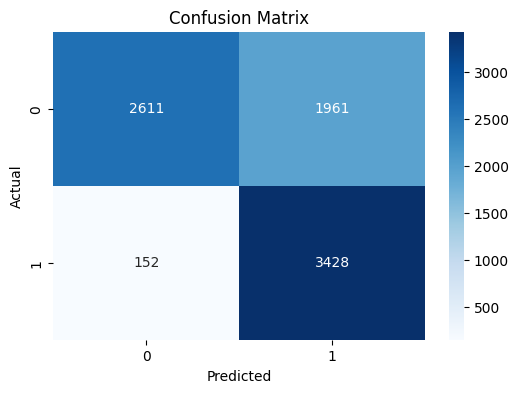

In [42]:
# Confusion Matrix


# Example: Assume these are your true and predicted labels
# Replace with your actual data
y_true = test['label']             # actual labels
y_pred = randomclassifier.predict(testdataset)  # predicted labels

# Create confusion matrix
cm = confusion_matrix(y_true, y_pred)

# Plot using seaborn
plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['0', '1'], yticklabels=['0', '1'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()



#### Apply to testing_data.csv

In [43]:
testing_data = pd.read_csv('dataset/testing_data.csv')
testing_df = testing_data.copy()
#snake_columns(df)

testing_df

,2\tcopycat muslim terrorist arrested with assault weapons
0,2\twow! chicago protester caught on camera adm...
1,2\tgermany's fdp look to fill schaeuble's big ...
2,2\tmi school sends welcome back packet warning...
3,2\tu.n. seeks 'massive' aid boost amid rohingy...
4,2\tdid oprah just leave ‚nasty‚ hillary wishin...
...,...
9978,2\tboom! fox news leftist chris wallace attemp...
9979,2\there it is: list of democrat hypocrites who...
9980,2\tnew fires ravage rohingya villages in north...
9981,2\tmeals on wheels shuts the lyin‚ lefties up ...


In [44]:
# make column name first row
headers_2 = testing_df.columns.tolist()
testing_df.loc[-1] = headers_2  
testing_df.index = testing_df.index + 1 
testing_df = testing_df.sort_index() 

# rename column name
testing_df.columns = ['headline']

testing_df

,headline
0,2\tcopycat muslim terrorist arrested with assa...
1,2\twow! chicago protester caught on camera adm...
2,2\tgermany's fdp look to fill schaeuble's big ...
3,2\tmi school sends welcome back packet warning...
4,2\tu.n. seeks 'massive' aid boost amid rohingy...
...,...
9979,2\tboom! fox news leftist chris wallace attemp...
9980,2\there it is: list of democrat hypocrites who...
9981,2\tnew fires ravage rohingya villages in north...
9982,2\tmeals on wheels shuts the lyin‚ lefties up ...


In [45]:
# make new column from first letter
testing_df['label'] = testing_df['headline'].str[0]

# move label column to the beginning
testing_df = testing_df[['label'] + [col for col in df.columns if col != 'label']]

# delete first two letters from each column
testing_df['headline'] = testing_df['headline'].str[2:]

testing_df

,label,headline
0,2,copycat muslim terrorist arrested with assault...
1,2,wow! chicago protester caught on camera admits...
2,2,germany's fdp look to fill schaeuble's big shoes
3,2,mi school sends welcome back packet warning ki...
4,2,u.n. seeks 'massive' aid boost amid rohingya '...
...,...,...
9979,2,boom! fox news leftist chris wallace attempts ...
9980,2,here it is: list of democrat hypocrites who vo...
9981,2,new fires ravage rohingya villages in northwes...
9982,2,meals on wheels shuts the lyin‚ lefties up wit...


In [47]:
# 1. Clean the text (same way you did for training/test)
testing_df['headline'] = testing_df['headline'].str.replace("[^a-zA-Z]", " ", regex=True)
testing_df['headline'] = testing_df['headline'].str.lower().str.strip()

# 2. Convert to a list
test_input = testing_df['headline'].tolist()

# 3. Use the SAME vectorizer you trained earlier (e.g., countvector or vectorizer)
#X_testing = tfidf_vectorizer.transform(test_input)  # or tfidfvector.transform(...)
X_testing = countvector.transform(test_input)  # or whatever vectorizer you trained

# 4. Predict using the trained model
predicted_labels = randomclassifier.predict(X_testing)  # or whatever model you trained

# 5. Attach predictions back to the DataFrame
testing_df['predicted_label'] = predicted_labels

# 6. Optional: view or save
print(testing_df[['headline', 'predicted_label']].head())


                                            headline predicted_label
0  copycat muslim terrorist arrested with assault...               1
1  wow  chicago protester caught on camera admits...               0
2   germany s fdp look to fill schaeuble s big shoes               1
3  mi school sends welcome back packet warning ki...               1
4  u n  seeks  massive  aid boost amid rohingya  ...               1


In [48]:
# drop the original label column
testing_df.drop(columns=['label'], inplace=True)

# Rename the column
testing_df.rename(columns={'predicted_label': 'label'}, inplace=True)

# Move 'label' column to the front
cols = ['label'] + [col for col in testing_df.columns if col != 'label']
testing_df = testing_df[cols]

# Optional: preview result
print(testing_df.head())


  label                                           headline
0     1  copycat muslim terrorist arrested with assault...
1     0  wow  chicago protester caught on camera admits...
2     1   germany s fdp look to fill schaeuble s big shoes
3     1  mi school sends welcome back packet warning ki...
4     1  u n  seeks  massive  aid boost amid rohingya  ...


In [49]:
# save as csv file
testing_df.to_csv('testing_data_with_predictions.csv', index=False)